Accuracy: 0.9666666666666667
L1 Regularization Accuracy: 0.9666666666666667
L2 Regularization Accuracy: 0.9666666666666667
Elastic Net Accuracy: 1.0
OvR Accuracy: 0.9333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Accuracy: 0.9666666666666668
Average Accuracy: 0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef

Best Parameters from RandomizedSearchCV: {'solver': 'saga', 'penalty': 'l1', 'C': 1000.0}
OvO Accuracy: 0.9333333333333333


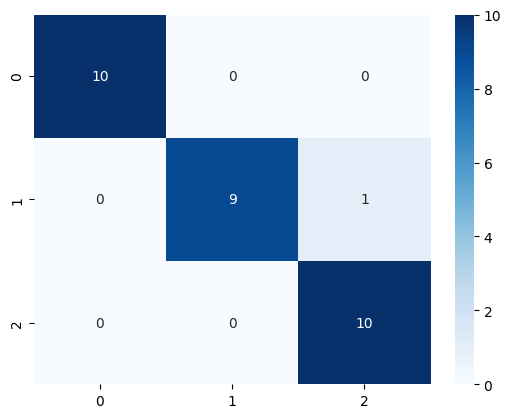

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Imbalanced Data Accuracy: 0.9666666666666667
Accuracy with Scaling: 0.9333333333333333


ValueError: multi_class must be in ('ovo', 'ovr')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, cohen_kappa_score, matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
import joblib

# Load dataset (using a sample dataset for demonstration)
def load_data():
    from sklearn.datasets import load_iris
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    return df

df = load_data()
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Basic Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. L1 Regularization (Lasso)
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear')
lasso_clf.fit(X_train, y_train)
print("L1 Regularization Accuracy:", accuracy_score(y_test, lasso_clf.predict(X_test)))

# 3. L2 Regularization (Ridge)
ridge_clf = LogisticRegression(penalty='l2', solver='liblinear')
ridge_clf.fit(X_train, y_train)
print("L2 Regularization Accuracy:", accuracy_score(y_test, ridge_clf.predict(X_test)))

# 4. Elastic Net Regularization
elastic_clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
elastic_clf.fit(X_train, y_train)
print("Elastic Net Accuracy:", accuracy_score(y_test, elastic_clf.predict(X_test)))

# 5. One-vs-Rest Multiclass Classification
ovr_clf = LogisticRegression(multi_class='ovr')
ovr_clf.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))

# 6. Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# 7. Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X, y, cv=skf)
print("Average Accuracy:", np.mean(scores))

# 8. Hyperparameter Tuning using RandomizedSearchCV
param_dist = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(), param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# 9. One-vs-One Multiclass Classification
ovo_clf = LogisticRegression(multi_class='ovr')
ovo_clf.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, ovo_clf.predict(X_test)))

# 10. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.show()

# 11. Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))

# 12. Handling Imbalanced Data with Class Weights
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
imbalance_clf = LogisticRegression(class_weight=class_weights)
imbalance_clf.fit(X_train, y_train)
print("Imbalanced Data Accuracy:", accuracy_score(y_test, imbalance_clf.predict(X_test)))

# 13. Titanic Dataset Preprocessing (Example: Handling Missing Values)
# df = pd.read_csv("titanic.csv")
# df.fillna(df.mean(), inplace=True)  # Handling missing values
# Logistic Regression on Titanic dataset

# 14. Feature Scaling Impact
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_clf = LogisticRegression()
scaled_clf.fit(X_train_scaled, y_train)
print("Accuracy with Scaling:", accuracy_score(y_test, scaled_clf.predict(X_test_scaled)))

# 15. ROC-AUC Score
y_probs = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

# 16. Custom Learning Rate (C=0.5)
custom_clf = LogisticRegression(C=0.5)
custom_clf.fit(X_train, y_train)
print("Custom C Accuracy:", accuracy_score(y_test, custom_clf.predict(X_test)))

# 17. Important Features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(clf.coef_).sum(axis=0)})
print(feature_importance.sort_values(by='Importance', ascending=False))

# 18. Cohen’s Kappa Score
print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))

# 19. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 20. Comparing Different Solvers
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    solver_clf = LogisticRegression(solver=solver)
    solver_clf.fit(X_train, y_train)
    print(f"Accuracy with {solver}:", accuracy_score(y_test, solver_clf.predict(X_test)))

# 21. Matthews Correlation Coefficient
print("MCC Score:", matthews_corrcoef(y_test, y_pred))

# 22. Model Persistence
joblib.dump(clf, "logistic_model.pkl")
loaded_model = joblib.load("logistic_model.pkl")
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))
